In [1]:
import tensorflow as tf
import os
from utils import *
from tacotron import Tacotron
from tqdm import tqdm

In [2]:
paths, lengths, texts, raw_texts = [], [], [], []
text_files = [f for f in os.listdir('../mel') if f.endswith('.npy')]
for fpath in text_files:
    text = ' '.join([i for i in os.path.splitext(fpath)[0].split('-') if not i.isdigit()])
    paths.append(fpath.replace('.npy', ''))
    text = text_normalize(text)
    raw_texts.append(text)
    text = text + 'E'
    texts.append(np.array([char2idx[char] for char in text], np.int32))
    lengths.append(len(text))

In [3]:
paths[:2], lengths[:2], texts[:2]

(['tolong-sebut-monogramam', 'sebut-perkataan-man-abintara'],
 [24, 29],
 [array([22, 17, 14, 17, 16,  9,  2, 21,  7,  4, 23, 22,  2, 15, 17, 16, 17,
          9, 20,  3, 15,  3, 15,  1], dtype=int32),
  array([21,  7,  4, 23, 22,  2, 18,  7, 20, 13,  3, 22,  3,  3, 16,  2, 15,
          3, 16,  2,  3,  4, 11, 16, 22,  3, 20,  3,  1], dtype=int32)])

In [4]:
def dynamic_batching(paths):
    files, max_y, max_z = [], 0, 0
    for n in range(len(paths)):
        files.append(get_cached(paths[n]))
        if files[-1][0].shape[0] > max_y:
            max_y = files[-1][0].shape[0]
        if files[-1][1].shape[0] > max_z:
            max_z = files[-1][1].shape[0]
    return files, max_y, max_z

In [5]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = Tacotron()
sess.run(tf.global_variables_initializer())

minibatch loop: 100%|██████████| 46/46 [00:48<00:00,  1.18it/s, cost=3.77, cost1=0.119, cost2=0.19, cost_seq=3.46] 


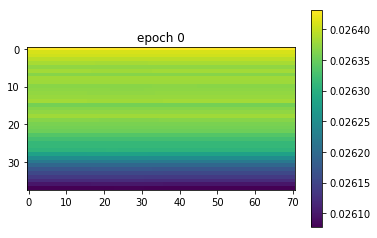

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.35it/s, cost=3.65, cost1=0.11, cost2=0.165, cost_seq=3.37] 


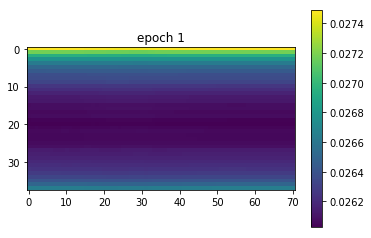

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.36it/s, cost=2.98, cost1=0.106, cost2=0.0953, cost_seq=2.78]


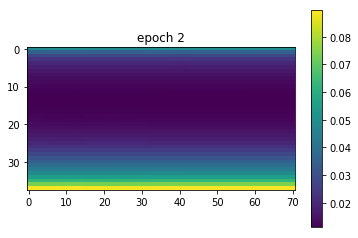

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.37it/s, cost=2.68, cost1=0.0879, cost2=0.0628, cost_seq=2.53]


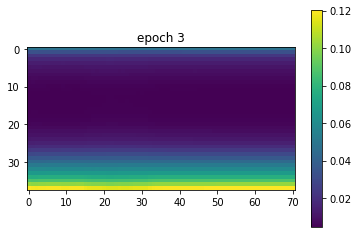

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.37it/s, cost=2.28, cost1=0.0693, cost2=0.0513, cost_seq=2.15]


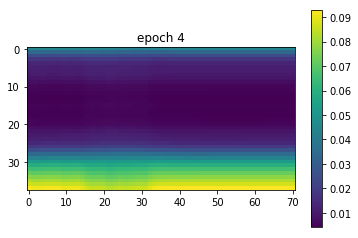

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.36it/s, cost=1.15, cost1=0.0737, cost2=0.0526, cost_seq=1.02]


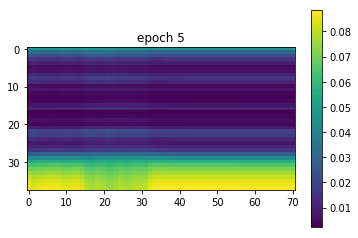

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.36it/s, cost=0.647, cost1=0.069, cost2=0.0465, cost_seq=0.531] 


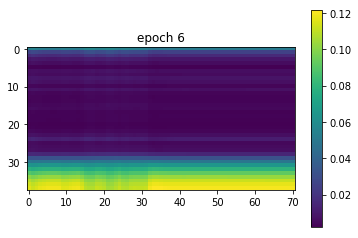

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.38it/s, cost=0.431, cost1=0.062, cost2=0.0456, cost_seq=0.324] 


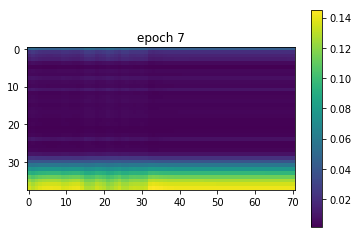

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.38it/s, cost=0.306, cost1=0.0572, cost2=0.0457, cost_seq=0.203]


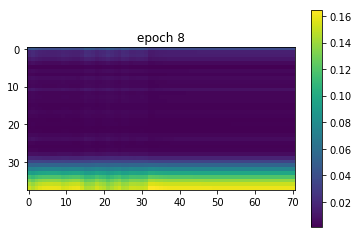

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.38it/s, cost=0.219, cost1=0.0522, cost2=0.0423, cost_seq=0.125]


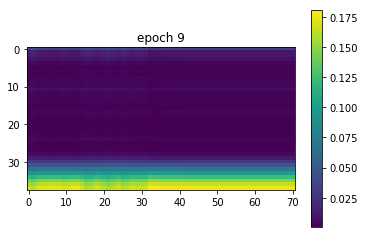

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.38it/s, cost=0.158, cost1=0.0485, cost2=0.0392, cost_seq=0.0705]


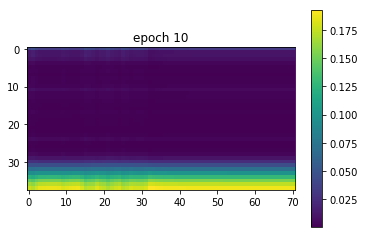

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.37it/s, cost=0.132, cost1=0.0461, cost2=0.0371, cost_seq=0.0488]


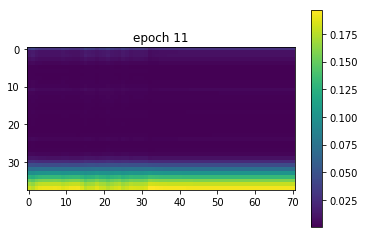

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.37it/s, cost=0.114, cost1=0.0434, cost2=0.0355, cost_seq=0.0349]


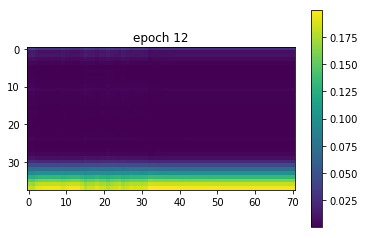

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.37it/s, cost=0.102, cost1=0.0414, cost2=0.0359, cost_seq=0.0249]


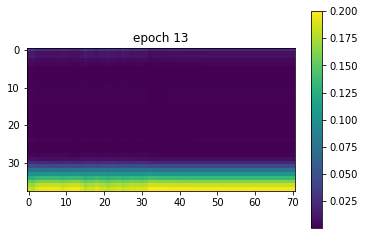

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.39it/s, cost=0.0993, cost1=0.0421, cost2=0.0349, cost_seq=0.0223]


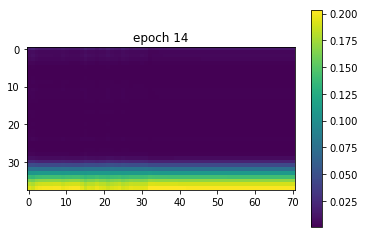

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.37it/s, cost=0.0948, cost1=0.0387, cost2=0.0333, cost_seq=0.0227]


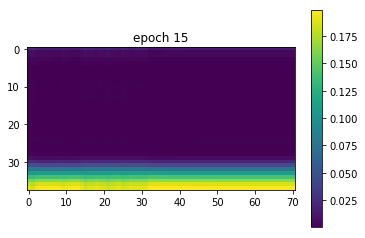

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.37it/s, cost=0.0835, cost1=0.0367, cost2=0.0325, cost_seq=0.0142]


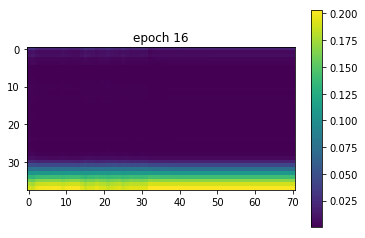

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.37it/s, cost=0.0795, cost1=0.0359, cost2=0.0322, cost_seq=0.0114] 


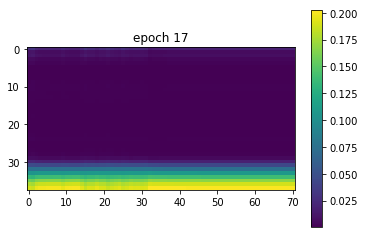

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.38it/s, cost=0.0769, cost1=0.0358, cost2=0.0317, cost_seq=0.00941]


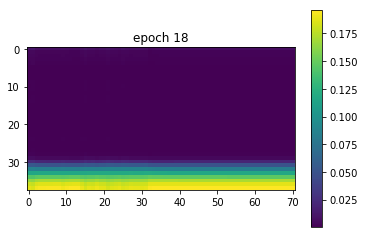

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.38it/s, cost=0.0762, cost1=0.0346, cost2=0.0313, cost_seq=0.0102] 


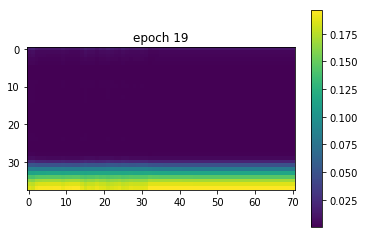

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.37it/s, cost=0.101, cost1=0.038, cost2=0.0317, cost_seq=0.0312]   


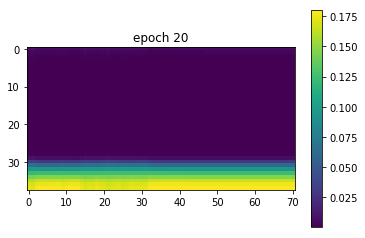

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.37it/s, cost=0.0749, cost1=0.0336, cost2=0.0308, cost_seq=0.0104] 


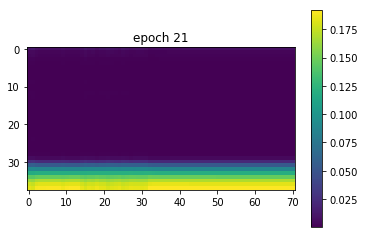

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.38it/s, cost=0.0744, cost1=0.0332, cost2=0.0309, cost_seq=0.0103] 


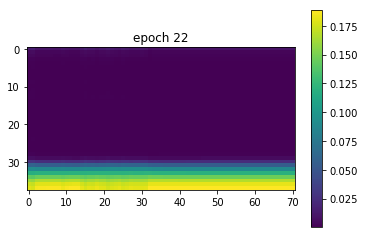

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.39it/s, cost=0.0688, cost1=0.0324, cost2=0.0314, cost_seq=0.00501]


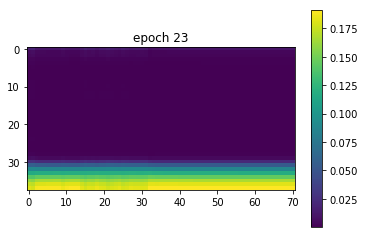

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.37it/s, cost=0.0686, cost1=0.0324, cost2=0.0322, cost_seq=0.00402]


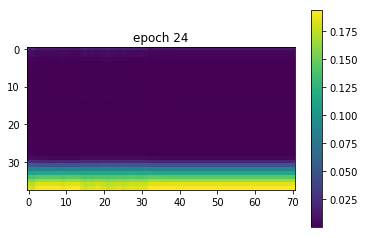

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.39it/s, cost=0.0777, cost1=0.0395, cost2=0.0351, cost_seq=0.00305]


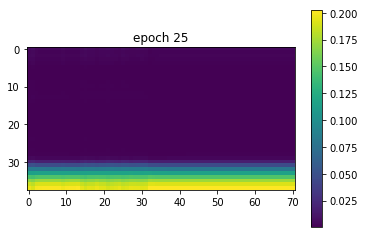

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.39it/s, cost=0.0643, cost1=0.0314, cost2=0.0305, cost_seq=0.00241]


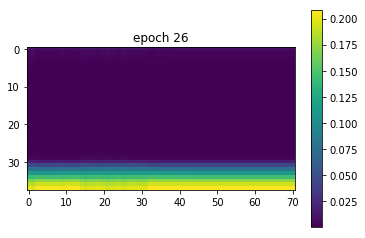

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.37it/s, cost=0.0628, cost1=0.0307, cost2=0.0301, cost_seq=0.00198]


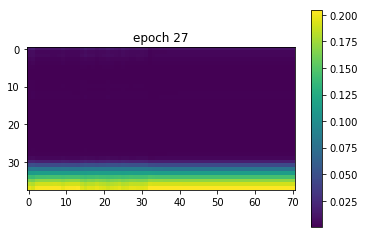

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.40it/s, cost=0.0622, cost1=0.0305, cost2=0.03, cost_seq=0.00173]  


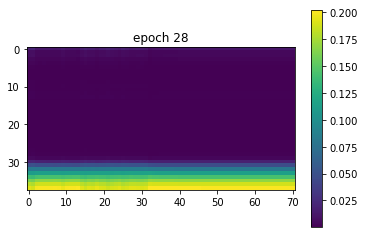

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.38it/s, cost=0.062, cost1=0.0303, cost2=0.0301, cost_seq=0.00152] 


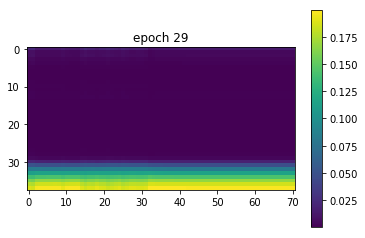

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.40it/s, cost=0.0792, cost1=0.034, cost2=0.0303, cost_seq=0.0149]  


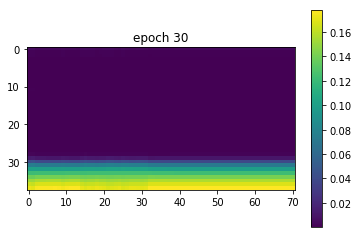

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.38it/s, cost=0.0647, cost1=0.0304, cost2=0.0299, cost_seq=0.00442]


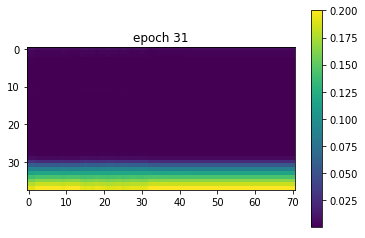

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.40it/s, cost=0.0653, cost1=0.0301, cost2=0.0329, cost_seq=0.00224]


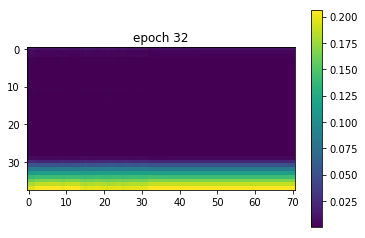

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.39it/s, cost=0.0609, cost1=0.0294, cost2=0.03, cost_seq=0.00146]  


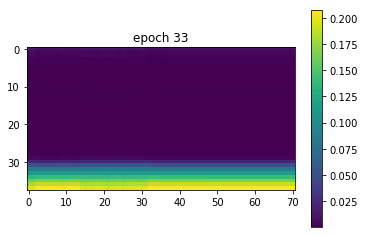

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.38it/s, cost=0.0602, cost1=0.0292, cost2=0.0298, cost_seq=0.00121] 


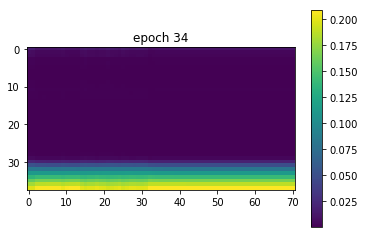

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.38it/s, cost=0.0605, cost1=0.0293, cost2=0.0301, cost_seq=0.00107] 


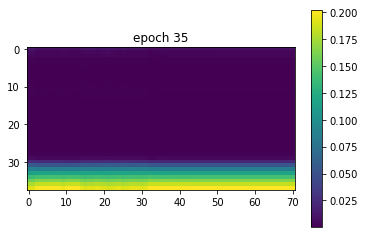

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.40it/s, cost=0.0593, cost1=0.0289, cost2=0.0295, cost_seq=0.000919]


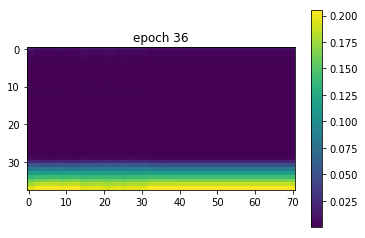

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.39it/s, cost=0.0887, cost1=0.0435, cost2=0.0441, cost_seq=0.00106] 


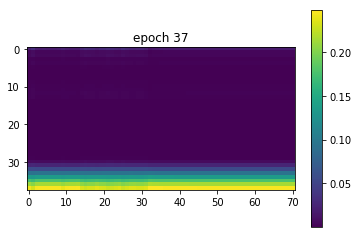

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.40it/s, cost=0.0622, cost1=0.0303, cost2=0.031, cost_seq=0.000815] 


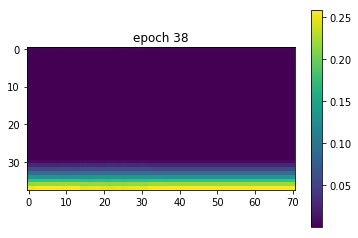

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.39it/s, cost=0.0596, cost1=0.029, cost2=0.0299, cost_seq=0.000697] 


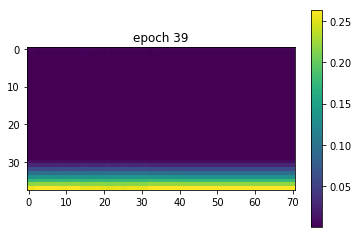

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.40it/s, cost=0.0587, cost1=0.0284, cost2=0.0298, cost_seq=0.000615]


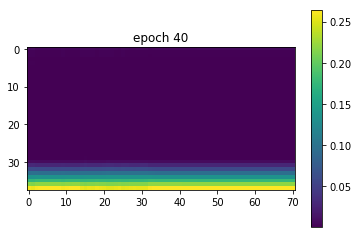

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.40it/s, cost=0.0584, cost1=0.0282, cost2=0.0296, cost_seq=0.000562]


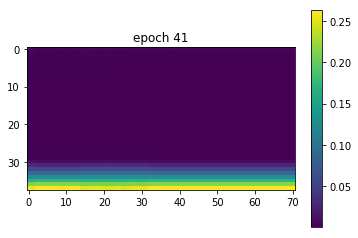

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.39it/s, cost=0.0584, cost1=0.0282, cost2=0.0297, cost_seq=0.000519]


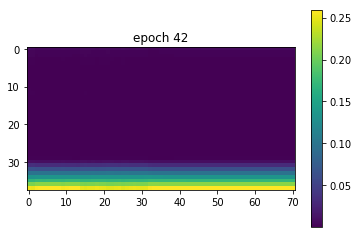

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.38it/s, cost=0.0627, cost1=0.0286, cost2=0.0336, cost_seq=0.00048] 


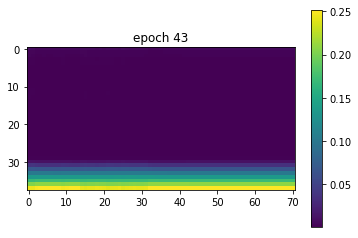

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.40it/s, cost=0.0584, cost1=0.0279, cost2=0.03, cost_seq=0.00045]   


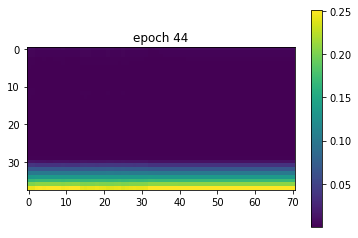

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.38it/s, cost=0.0573, cost1=0.0276, cost2=0.0292, cost_seq=0.000417]


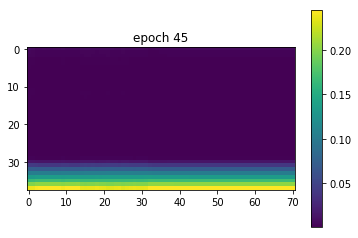

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.38it/s, cost=0.0596, cost1=0.0277, cost2=0.0315, cost_seq=0.000389]


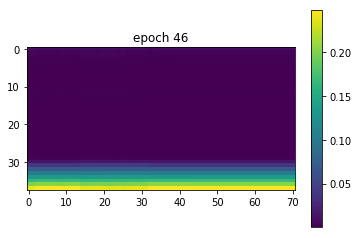

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.37it/s, cost=0.0587, cost1=0.0278, cost2=0.0305, cost_seq=0.000366]


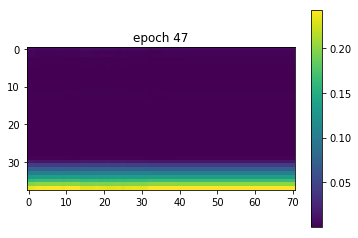

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.39it/s, cost=0.0564, cost1=0.027, cost2=0.0291, cost_seq=0.000349] 


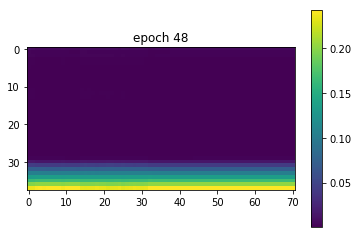

minibatch loop: 100%|██████████| 46/46 [00:34<00:00,  1.39it/s, cost=0.0586, cost1=0.0273, cost2=0.0309, cost_seq=0.000321]


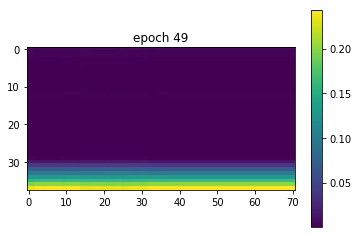

In [6]:
EPOCH = 50
for i in range(EPOCH):
    pbar = tqdm(range(0, len(paths), batch_size), desc = 'minibatch loop')
    for k in pbar:
        index = min(k + batch_size, len(paths))
        files, max_y, max_z = dynamic_batching(paths[k:index])
        max_x = max(lengths[k:index])
        batch_x = np.zeros((batch_size, max_x))
        batch_y = np.zeros((batch_size, max_y, n_mels * resampled))
        batch_z = np.zeros((batch_size, max_z, fourier_window_size // 2 + 1))
        for n in range(len(files)):
            batch_x[n, :] = np.pad(
                texts[k + n],
                ((0, max_x - texts[k + n].shape[0])),
                mode = 'constant',
            )
            batch_y[n, :, :] = np.pad(
                files[n][0],
                ((0, max_y - files[n][0].shape[0]), (0, 0)),
                mode = 'constant',
            )
            batch_z[n, :, :] = np.pad(
                files[n][1],
                ((0, max_z - files[n][1].shape[0]), (0, 0)),
                mode = 'constant',
            )
        _, cost, cost1, cost2, cost_seq = sess.run(
            [model.optimizer, model.loss, model.loss1, model.loss2, model.seq_loss],
            feed_dict = {model.X: batch_x, model.Y: batch_y, model.Z: batch_z, model.training: True},
        )
        pbar.set_postfix(cost = cost, cost1 = cost1, cost2 = cost2, cost_seq = cost_seq)
    align = sess.run(
        model.alignments, feed_dict = {model.X: batch_x, model.Y: batch_y, model.training: True}
    )
    plot_alignment(align[0, :, :], i)

In [25]:
y_hat = np.zeros((1, 100, n_mels * resampled), np.float32)
for j in tqdm(range(100)):
    _y_hat = sess.run(model.Y_hat, {model.X: [texts[0]], model.Y: y_hat, model.training: True})
    y_hat[:, j, :] = _y_hat[:, j, :]

100%|██████████| 100/100 [00:07<00:00, 13.63it/s]


In [30]:
mags = sess.run(model.Z_hat, {model.Y_hat: [batch_y[0]], model.training: True})

In [31]:
audio = spectrogram2wav(mags[0])

In [32]:
import IPython.display as ipd
ipd.Audio(audio, rate = sample_rate)

In [33]:
from scipy.io.wavfile import write
write(os.path.join('test.wav'), sample_rate, audio)

In [34]:
real_audio = spectrogram2wav(batch_z[0])
ipd.Audio(real_audio, rate = sample_rate)